<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-12-25 12:49:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  35.9MB/s    in 1.0s    

2024-12-25 12:49:20 (35.9 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [14]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


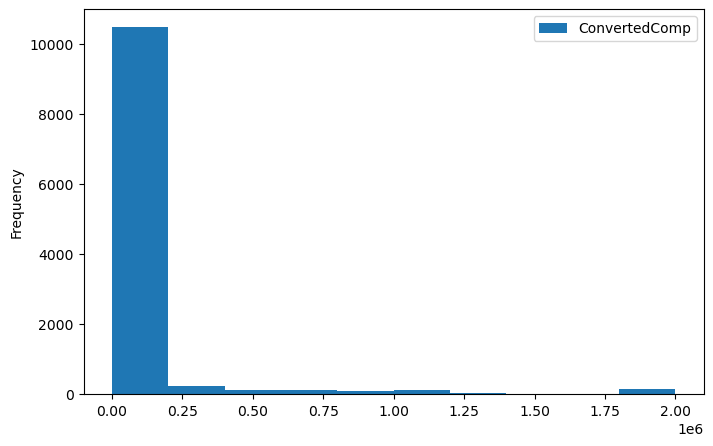

In [26]:
# your code goes here
QUERY = """
SELECT ConvertedComp FROM
master
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df=pd.read_sql_query(QUERY,conn)
df["ConvertedComp"].replace(np.nan, 131596, inplace=True)
df.plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
#plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
#plt.ylabel('Number of Countries')
# add x-label
#plt.xlabel('Number of Immigrants')

plt.show()

#count, bin_edges = np.histogram(df["ConvertedComp"])



#print(count) # frequency count
#print(bin_edges) # bin ranges, default = 10 bins

### Box Plots


Plot a box plot of `Age.`


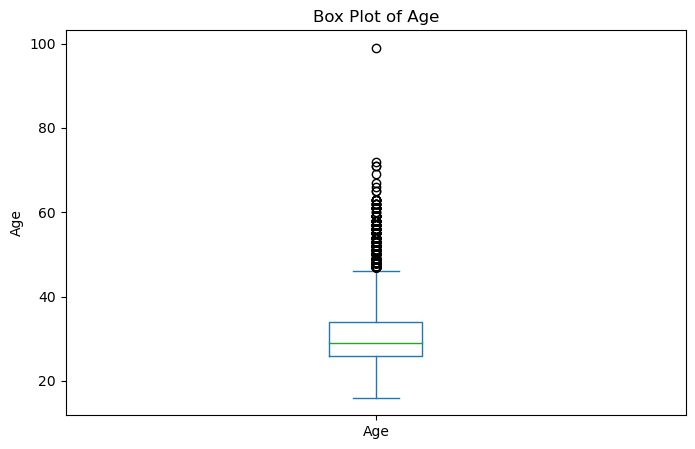

In [39]:
# your code goes here

QUERY = """
SELECT Age FROM
master
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df=pd.read_sql_query(QUERY,conn)

df["Age"].replace(np.nan, 29, inplace=True) #replacing blanks with median of Age

df["Age"].plot(kind='box', figsize=(8, 5))

plt.title('Box Plot of Age')
# add x-label
#plt.xlabel('Age')
# add y-label
plt.ylabel('Age')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


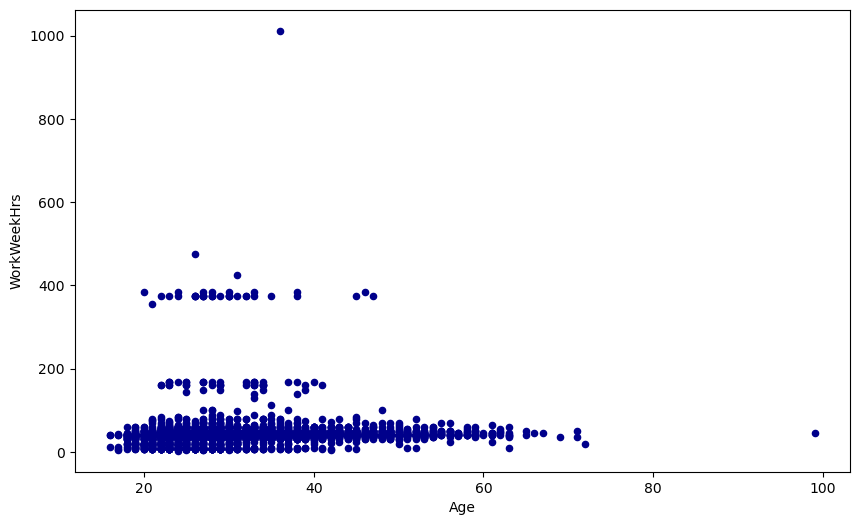

40.0     5585
45.0     1120
50.0      732
35.0      587
42.0      431
         ... 
66.0        1
64.0        1
41.2        1
355.0       1
61.0        1
Name: WorkWeekHrs, Length: 113, dtype: int64

In [78]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs FROM
master
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df=pd.read_sql_query(QUERY,conn)
df["Age"].replace(np.nan, 29, inplace=True) #replacing blanks with median of Age
df["WorkWeekHrs"].replace(np.nan, 42, inplace=True) #replacing blanks with mean  of WorkWeekHrs
#df["WorkWeekHrs"].mean()

df.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')

#plt.title('Total Immigration to Canada from 1980 - 2013')
#plt.xlabel('Year')
#plt.ylabel('Number of Immigrants')

plt.show()

df["WorkWeekHrs"].value_counts()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


'\n# Argentina\nax1 = df_can_t.plot(kind=\'scatter\',\n                    x=\'Year\',\n                    y=\'Argentina\',\n                    alpha=0.5,\n                    color="blue",\n                    s=norm_argentina * 2000 + 10,\n                    ax=ax0\n                    )\n\nax0.set_ylabel(\'Number of Immigrants\')\nax0.set_title(\'Immigration from Brazil and Argentina from 1980 to 2013\')\nax0.legend([\'Brazil\', \'Argentina\'], loc=\'upper left\', fontsize=\'x-large\')\n\n'

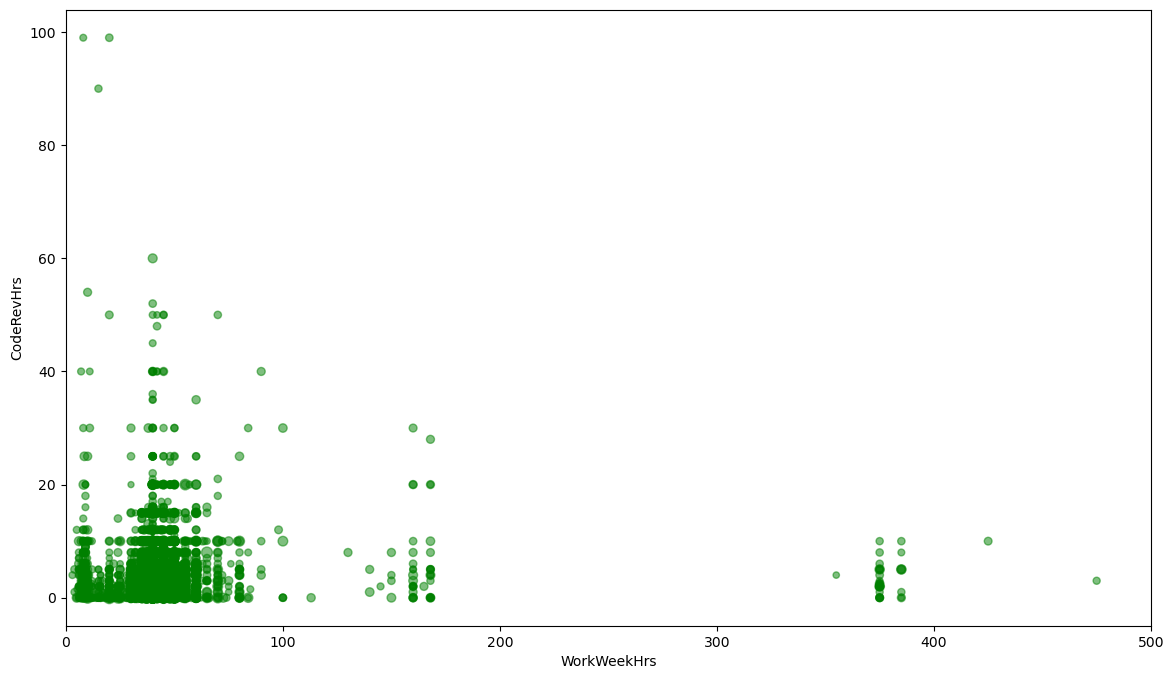

In [87]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs  FROM
master
"""
df=pd.read_sql_query(QUERY,conn)
df["Age"].replace(np.nan, 29, inplace=True) #replacing blanks with median of Age
df["WorkWeekHrs"].replace(np.nan, 42, inplace=True) #replacing blanks with mean  of WorkWeekHrs
df["CodeRevHrs"].replace(np.nan, 0, inplace=True) #Replacinf Nan with 0

# WorkWeekHrs
ax0 = df.plot(kind='scatter',
                    x='WorkWeekHrs',
                    y='CodeRevHrs',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s='Age', # pass in weights 
                    xlim=(0, 500)
                    )
'''

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

'''

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


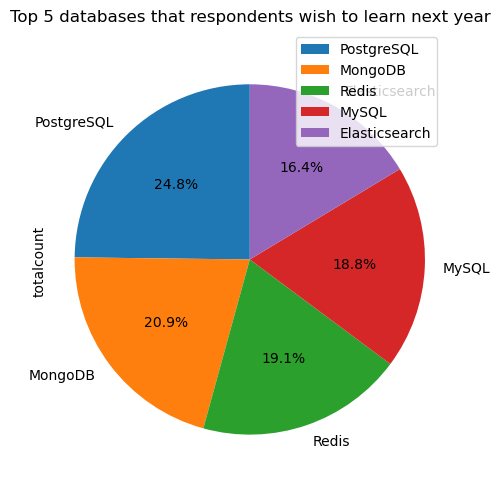

In [124]:
# your code goes here

QUERY = """
SELECT DatabaseDesireNextYear, count(*) as totalcount FROM
DatabaseDesireNextYear 
group by DatabaseDesireNextYear order by totalcount desc
"""
df=pd.read_sql_query(QUERY,conn)
df_top5=df.head()
#df_top5
df_top5.set_index('DatabaseDesireNextYear', inplace=True)

df_top5['totalcount'].plot(kind='pie',
            figsize=(5, 6),
            autopct='%1.1f%%', # add in percentages
            startangle=90,     # start angle 90° (Africa)
            #shadow=True,       # add shadow
            
            )

plt.title('Top 5 databases that respondents wish to learn next year')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_top5.index, loc='upper right') 


#plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


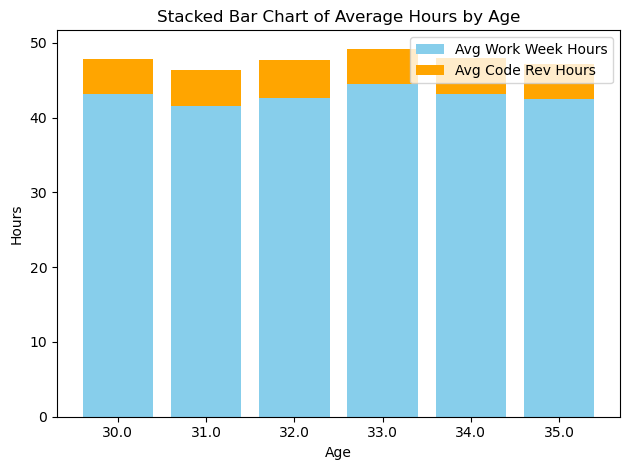

In [136]:
# your code goes here
QUERY = """
SELECT Age, AVG(WorkWeekHrs), AVG(CodeRevHrs)  FROM
master where Age>=30 and Age<=35 group by Age
"""
df=pd.read_sql_query(QUERY,conn)
df["Age"].replace(np.nan, 29, inplace=True) #replacing blanks with median of Age
#df["WorkWeekHrs"].replace(np.nan, 42, inplace=True) #replacing blanks with mean  of WorkWeekHrs
#df["CodeRevHrs"].replace(np.nan, 0, inplace=True) #Replacinf Nan with 0

# Plotting data
x = np.arange(len(df["Age"]))  # Positions for each age group
work_week_hrs = df["AVG(WorkWeekHrs)"]
code_rev_hrs = df["AVG(CodeRevHrs)"]

# Create the stacked bar chart
plt.bar(x, work_week_hrs, label='Avg Work Week Hours', color='skyblue')
plt.bar(x, code_rev_hrs, bottom=work_week_hrs, label='Avg Code Rev Hours', color='orange')

# Add labels and title
plt.xticks(x, df["Age"], fontsize=10)
plt.xlabel("Age")
plt.ylabel("Hours")
plt.title("Stacked Bar Chart of Average Hours by Age")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

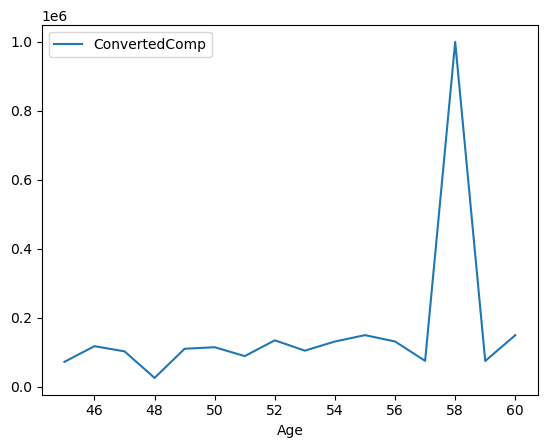

In [156]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp FROM
master where Age>=45 and Age<=60 group by Age
"""
df=pd.read_sql_query(QUERY,conn)
df["Age"].replace(np.nan, 29, inplace=True) #replacing blanks with median of Age
df["ConvertedComp"].replace(np.nan, 131596, inplace=True)
df.set_index('Age', inplace=True)


df.index = df.index.map(int) 
df.plot(kind='line')



### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


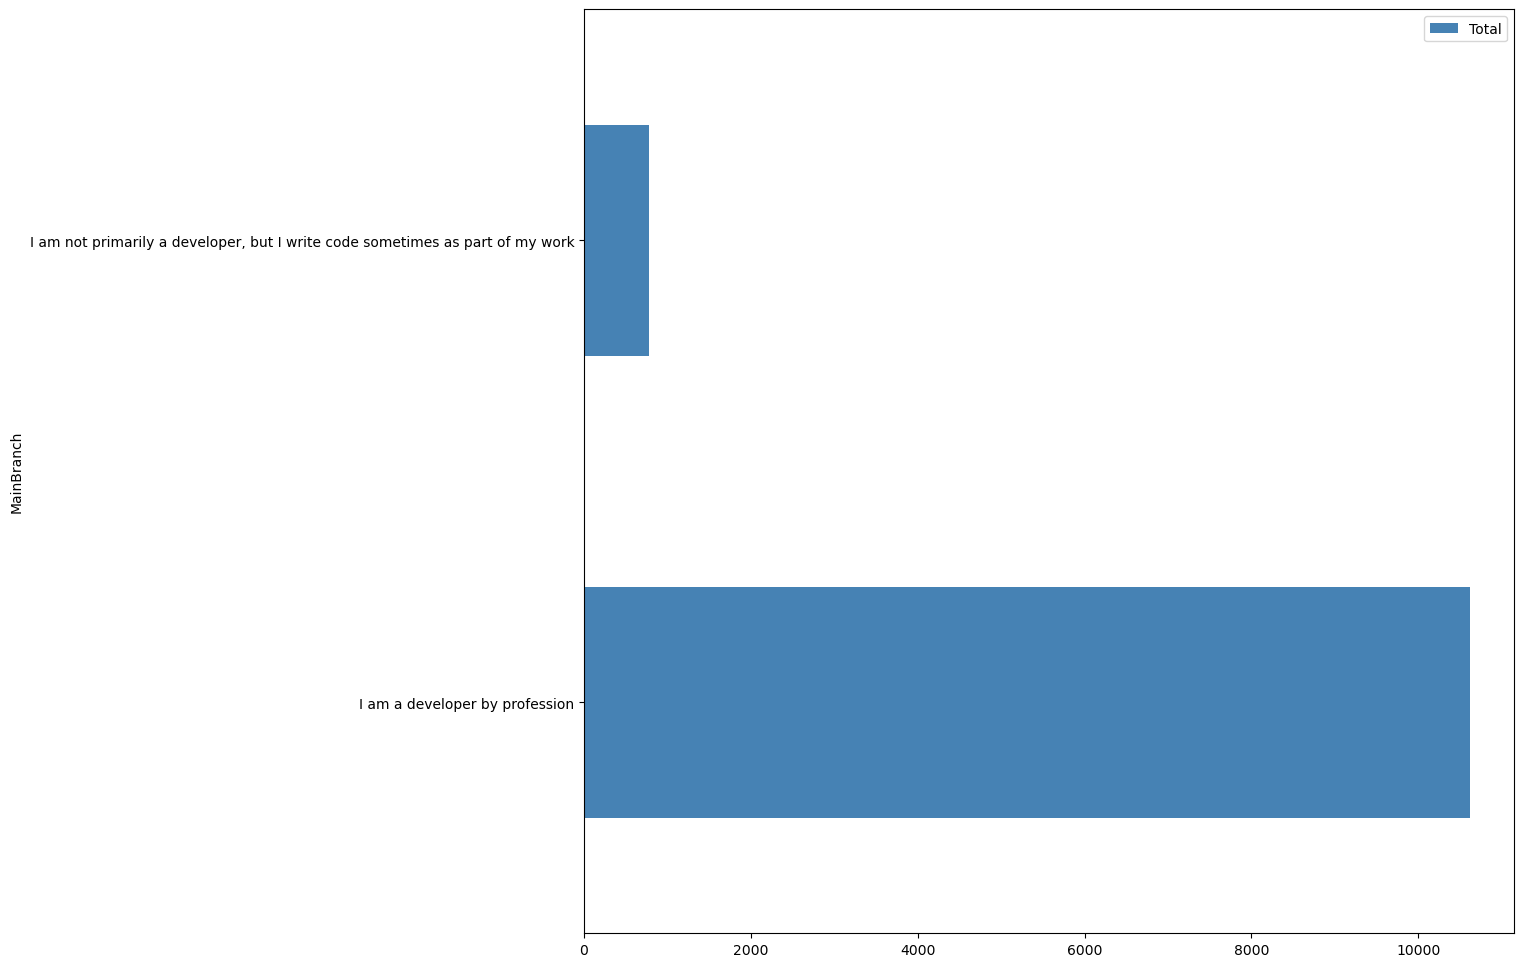

,Total
MainBranch,
I am a developer by profession,10618
"I am not primarily a developer, but I write code sometimes as part of my work",780


In [166]:
# your code goes here
QUERY = """
SELECT MainBranch, count(MainBranch) as Total FROM
master group by MainBranch
"""
df=pd.read_sql_query(QUERY,conn)
df.set_index('MainBranch', inplace=True)
df.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.show()
df


Close the database connection.


In [167]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
